<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/coating_process_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sugar syrup analytics

## Uploading necessary packages

In [ ]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021_sugar_syrup_data.xlsx

In [ ]:
#Uploading file from local drive ==> !rm file
from google.colab import files
uploaded1 = files.upload()

Saving 2021_sugar_syrup_data.xlsx to 2021_sugar_syrup_data.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_excel(io.BytesIO(uploaded1['2021_sugar_syrup_data.xlsx']))

In [ ]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Event            92 non-null     datetime64[ns]
 1   Year             92 non-null     int64         
 2   Month            92 non-null     object        
 3   Weeknum          92 non-null     int64         
 4   Weekday          92 non-null     object        
 5   Driamix_varming  92 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.4+ KB


##Data manipulation

In [ ]:
#Creating categorical values for multi-variate analysis
df1 = df1.assign(Team = np.where((df1['Event'].dt.day)<25, 'Team_1', 'Team_2'),
                 Shift = np.where((df1['Event'].dt.hour)<12, 'Day', 'Afternoon'),
                 Hour = df1['Event'].dt.hour)
df1.head(3)

,Event,Year,Month,Weeknum,Weekday,Driamix_varming,Team,Shift,Hour
0,2021-10-17 08:00:00,2021,October,41,Sunday,86,Team_1,Day,8
1,2021-10-17 09:00:00,2021,October,41,Sunday,88,Team_1,Day,9
2,2021-10-17 09:30:00,2021,October,41,Sunday,86,Team_1,Day,9


##Multi-variate Analysis

In [ ]:
#Creating list of categories
var_list = ['Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Hour']
var_list

['Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Hour']

In [ ]:
#Inspecting the proportion of data for different categories
@interact(Cat=var_list)
def proportion(Cat):
  return df1.value_counts(subset=Cat, normalize=True).reset_index(name='Proportion')

interactive(children=(Dropdown(description='Cat', options=('Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Ho…

In [ ]:
#Creating interactive visualization
@interact(Cat=var_list, Shift=['Shift', 'Team', None])
def plot_multi_variate(Cat, Shift):
  sns.boxplot(x=Cat, y='Driamix_varming', data=df1, hue=Shift)
  plt.title('Sugar Syrup Multi-variate Analysis')
  plt.legend(bbox_to_anchor=(1.25, 1)) #==> Set legend outside the chart
  plt.show()

interactive(children=(Dropdown(description='Cat', options=('Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Ho…

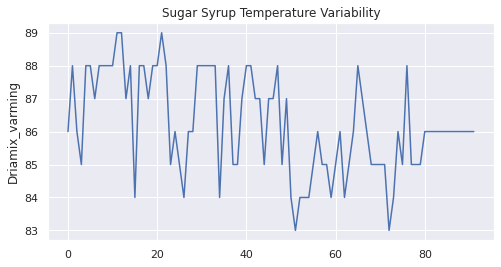

In [ ]:
#Plotting a scatter plot of the warming temperature
sns.lineplot(x=df1.index, y='Driamix_varming', data=df6)
plt.title('Sugar Syrup Temperature Variability')
plt.show()

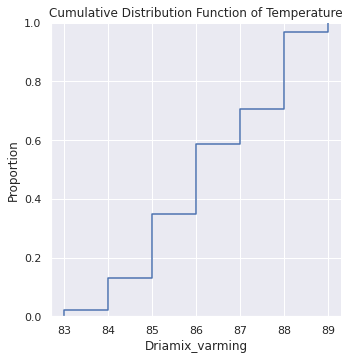

In [ ]:
#Plotting the Cumulative Distribution Function of the warming temperature
sns.displot(x='Driamix_varming', data=df1, kind='ecdf')
plt.title('Cumulative Distribution Function of Temperature')
plt.show()

#Packaging anomaly detection

## Uploading necessary packages

In [ ]:
#Upgrading Plotly
!pip install plotly --upgrade

In [1]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
from ipywidgets import interact

In [2]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 5)})

In [40]:
#Remove previous versions of the uploaded excel file
!rm 2021-11-29_12_5_anom.xlsx

In [41]:
#Uploading file from local drive
from google.colab import files
uploaded2 = files.upload()

Saving 2021-11-29_12_5_anom.xlsx to 2021-11-29_12_5_anom.xlsx


In [42]:
#Storing dataset in a Pandas Dataframe
import io
df2 = pd.read_excel(io.BytesIO(uploaded2['2021-11-29_12_5_anom.xlsx']), parse_dates=True)

In [43]:
#Checking the dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1208 non-null   datetime64[ns]
 1   Num     1208 non-null   int64         
 2   Cat     1208 non-null   object        
 3   Trial   1208 non-null   object        
 4   Min     20 non-null     object        
 5   Delta   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 56.8+ KB


In [44]:
#Checking the dataframe head
df2.head(1)

,Time,Num,Cat,Trial,Min,Delta
0,2021-11-29 12:30:11.277,0,Start,T1,0,NaT


##Data Visualization

In [45]:
#Plotting the count of good pieces by trial number
def plot_good_count():
  df = df2[(df2['Cat']!='Start') & (df2['Cat']!='WFD')].copy()
  df = df.groupby(by=['Trial']).agg(count = ('Num', 'count')).reset_index()
  x_orders = {'Trial': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10']}
  fig2_a = px.bar(data_frame=df, x='Trial', y='count', color='Trial',
                  title=f'Good pieces until failure - Wait for Dump', height=500, width=800,
                  color_discrete_sequence=px.colors.qualitative.D3, category_orders=x_orders)
  fig2_a.show()

plot_good_count()

In [9]:
#Plotting the anomalies detected vs time
def plot_anomaly_time():
  df = df2[(df2['Cat']=='WFD')].copy()
  x_orders = {'Trial': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10']}
  fig2_b = px.scatter(data_frame=df, x='Time', y='Cat', color='Trial',
                  title=f'Anomaly detected vs time', height=500, width=800,
                  color_discrete_sequence=px.colors.qualitative.D3, category_orders=x_orders)
  fig2_b.show()

plot_anomaly_time()

In [46]:
#Plotting the histogram of 
def plot_box_min():
  df = df2[(df2['Cat']=='WFD')].copy()
  fig2_c = px.box(data_frame=df, x='Delta',
                  title=f'Minutes elapsed until failure - Wait for Dump', height=500, width=800,
                  color_discrete_sequence=px.colors.qualitative.D3)
  fig2_c.show()

plot_box_min()